
# Sécurité dans les réseaux et protection de contenus audio-visuels
## Membre

| Prénom   |      NOM      |  Nombre etudiant |
|----------|:-------------:|------:|
| Duong Phuc Tai |  NGUYEN | 12108339 |
| Kamilia |    RAHIL   |   12109923 |

## TP2 – 2D IMAGE FILTERING
1. DCT – Discrete Cosine Transform
2. Low-pass filtering
3. High-pass filtering
4. Conclusion

### Importing necessary libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

## criteria library
from sklearn.metrics import mean_squared_error as compute_mse
from skimage.metrics import peak_signal_noise_ratio as compute_psnr
from skimage.metrics import structural_similarity as compute_ssim


In [2]:
## set the necessary path

_DATA = './data'
_RESULT = './result'

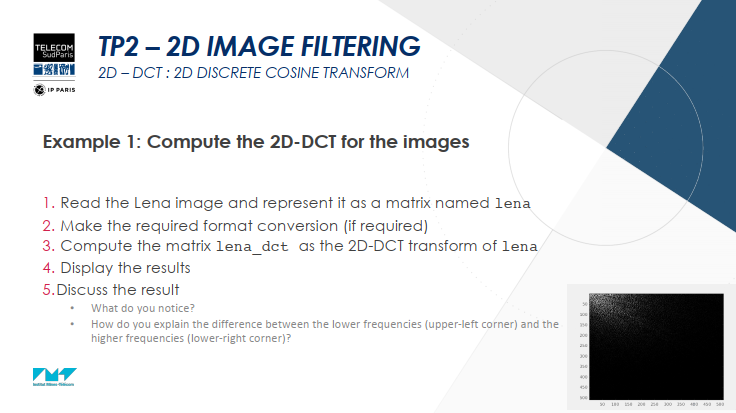

In [3]:
def read_image(img_name, data_fold = _DATA):
    """
    Read the Lena image and represent it as a matrix
    Make the required format conversion
    param:
        img_name: is the image's name file
        data_fold: is the path of data folder which store the images
    return:
        img_arr: is the matrix or array represent the image
    """
    ## read image
    img_bgr = cv2.imread(os.path.join(data_fold, img_name))
    ## convert color space to grayscale
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    img_arr = img_gray.copy()
    ## indicate the type of image array
    return img_arr.astype(float)

In [4]:
lena_arr = read_image('lena.jpg')
baboon_arr = read_image('baboon.jpg')

In [5]:
def show_grid(list_imgs, titles):
    """
    utils function to display the images as a grid
    param:
        list_imgs: list of images
        titles: list of titles
    return:
    
    """
    fig=plt.figure(figsize=(10, 5))
    columns = len(list_imgs)
    rows = 1
    for i in range(0, columns*rows):
        img = list_imgs[i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(titles[i])
#     plt.colorbar()

### Calculate DCT 2D

-5218.278978857172 63514.06640625001


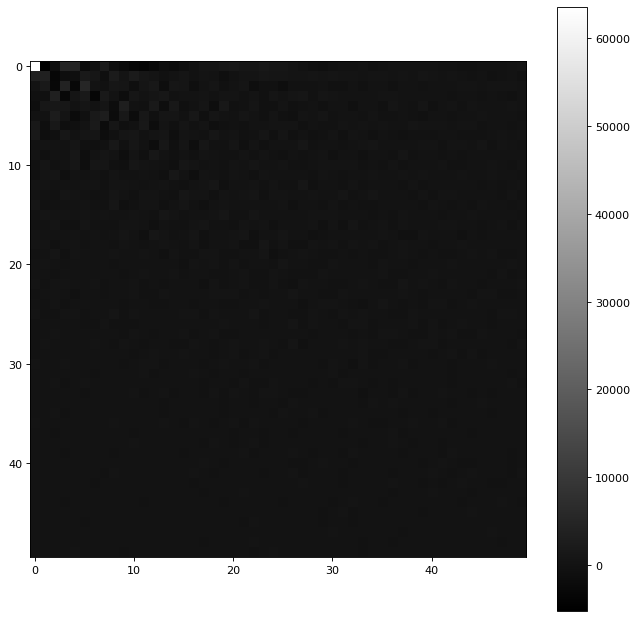

In [6]:
## DCT transform using OpenCV
lena_dct = cv2.dct(lena_arr)
print(np.min(lena_dct), np.max(lena_dct))
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(lena_dct[:50,:50], cmap='gray')
plt.colorbar()

-5520.232799422118 55507.37890625


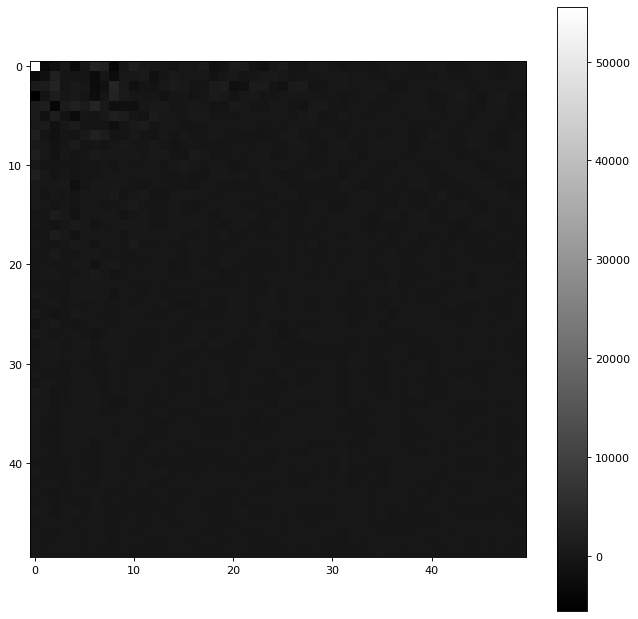

In [7]:
## DCT transform using OpenCV
baboon_dct = cv2.dct(baboon_arr)
print(np.min(baboon_dct), np.max(baboon_dct))
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(baboon_dct[:50,:50], cmap='gray')
plt.colorbar()

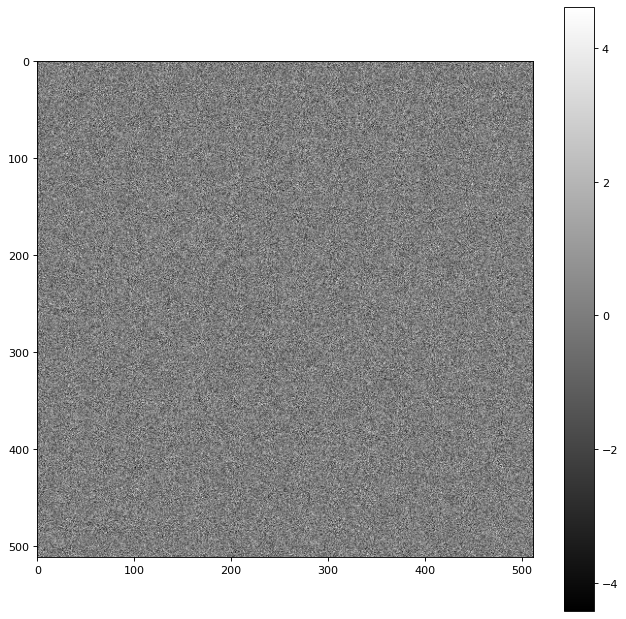

In [8]:
rand_arr = np.random.randn(512,512)
rand_dct = cv2.dct(rand_arr)
plt.figure(figsize=(10, 10), dpi=80)
plt.imshow(rand_dct, cmap='gray')
plt.colorbar()

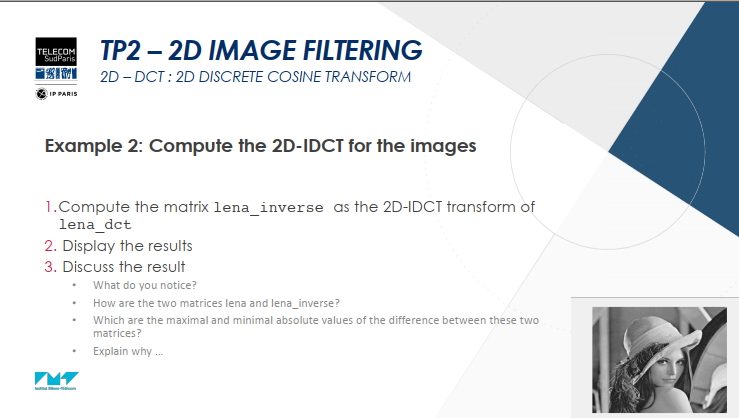

22.00000000000305 247.99999999999088


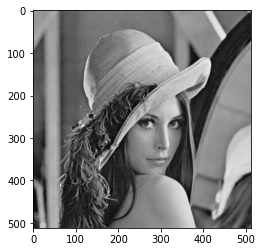

In [9]:
## IDCT transform using OpenCV
lena_idct = cv2.idct(lena_dct)
print(np.min(lena_idct), np.max(lena_idct))
plt.imshow(lena_idct, cmap='gray')

In [10]:
## compare original image and inverse DCT image
psnr = compute_psnr(lena_arr.astype(np.uint8), lena_idct.astype(np.uint8))
ssim = compute_ssim(lena_arr, lena_idct)
mse = compute_mse(lena_arr, lena_idct)
print(f'PNSR: {psnr}; SSIM: {ssim}; MSE: {mse}')
print(f'Max difference: {np.max(lena_arr - lena_idct)}')

PNSR: 51.05498620494485; SSIM: 0.9999999999999845; MSE: 3.576126941630537e-24
Max difference: 9.123368727159686e-12


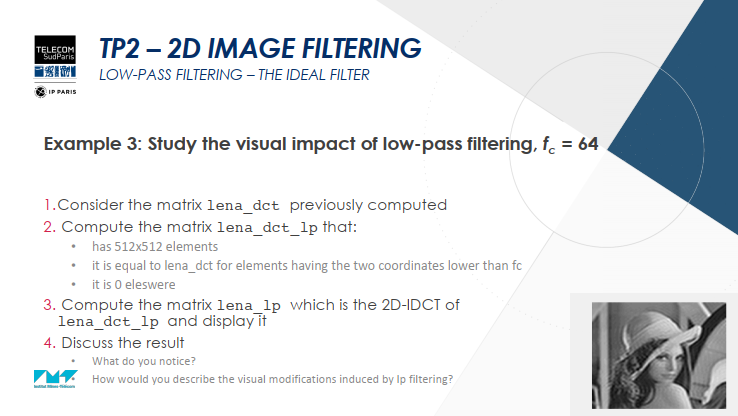

In [11]:
def low_pass_filter(dct_coef, fc):
    """
    get coefficients in the low-freq area
    param:
        dct_coef: is the coefficients of image after applying DCT transform
        fc: is the cut frequency
    return:
        sign_coef: is the significant coefficients under the cut frequency
    """
    sign_coef = np.zeros(dct_coef.shape)
    sign_coef[:fc, :fc] = dct_coef[:fc, :fc]
    return sign_coef

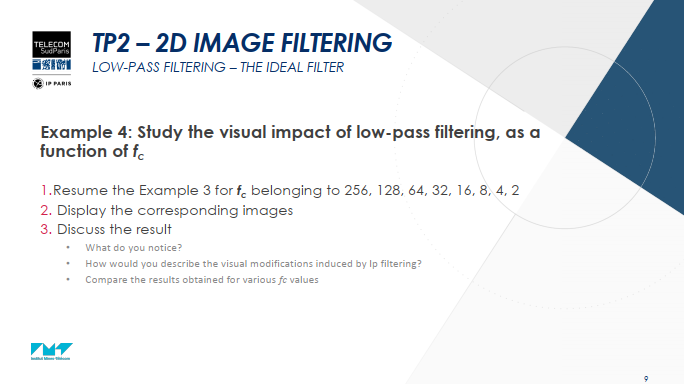

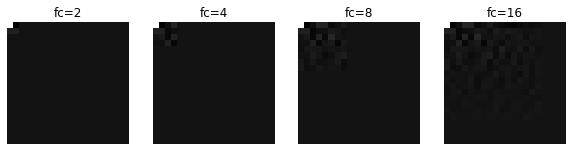

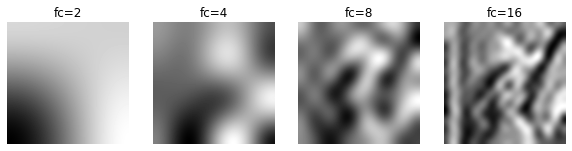

In [12]:
## survey with many different frequencies
list_exp = np.arange(1, 5, 1)
list_fc = np.power(2, list_exp)
list_coef_lpf = []
list_idct = []
for fc in list_fc:
    lena_dct_lp = low_pass_filter(lena_dct, fc)
    list_coef_lpf.append(lena_dct_lp)
    list_idct.append(cv2.idct(lena_dct_lp))
show_grid(np.array(list_coef_lpf)[:,:20,:20], [f'fc={item}' for item in list(list_fc)])
show_grid(np.array(list_idct), [f'fc={item}' for item in list(list_fc)])

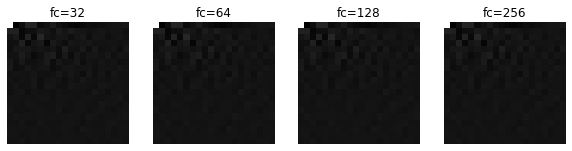

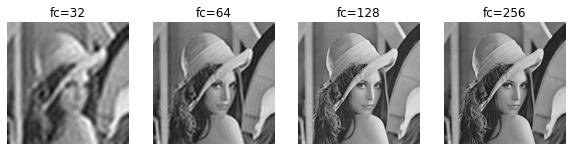

In [13]:
## survey with many different frequencies
list_exp = np.arange(5, 9, 1)
list_fc = np.power(2, list_exp)
list_coef_lpf = []
list_idct = []
for fc in list_fc:
    lena_dct_lp = low_pass_filter(lena_dct, fc)
    list_coef_lpf.append(lena_dct_lp)
    list_idct.append(cv2.idct(lena_dct_lp))
show_grid(np.array(list_coef_lpf)[:,:20,:20], [f'fc={item}' for item in list(list_fc)])
show_grid(np.array(list_idct), [f'fc={item}' for item in list(list_fc)])

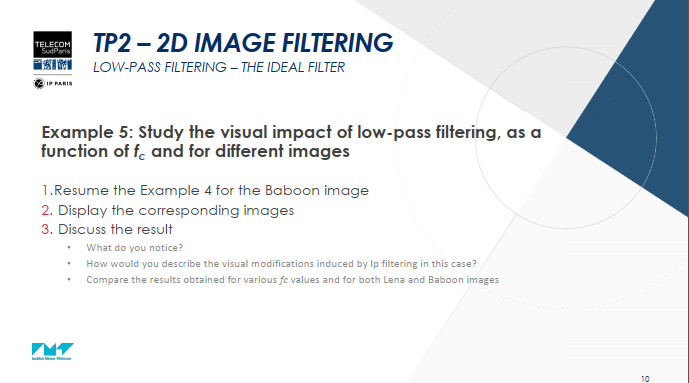

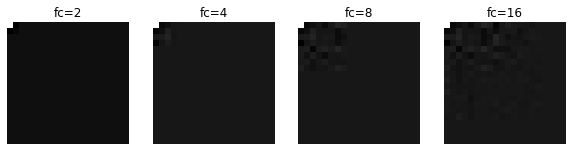

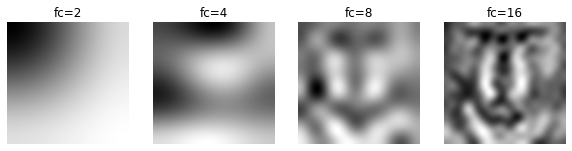

In [14]:
## survey with many different frequencies
list_exp = np.arange(1, 5, 1)
list_fc = np.power(2, list_exp)
list_coef_lpf = []
list_idct = []
for fc in list_fc:
    baboon_dct_lp = low_pass_filter(baboon_dct, fc)
    list_coef_lpf.append(baboon_dct_lp)
    list_idct.append(cv2.idct(baboon_dct_lp))
show_grid(np.array(list_coef_lpf)[:,:20,:20], [f'fc={item}' for item in list(list_fc)])
show_grid(np.array(list_idct), [f'fc={item}' for item in list(list_fc)])

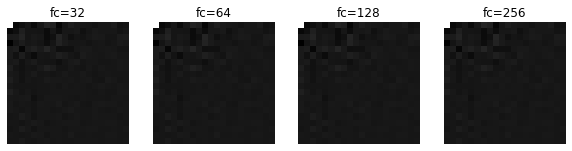

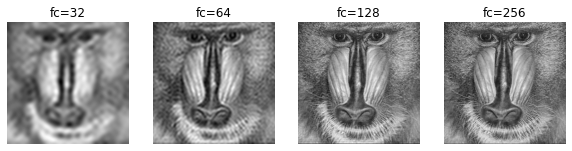

In [15]:
## survey with many different frequencies
list_exp = np.arange(5, 9, 1)
list_fc = np.power(2, list_exp)
list_coef_lpf = []
list_idct = []
for fc in list_fc:
    baboon_dct_lp = low_pass_filter(baboon_dct, fc)
    list_coef_lpf.append(baboon_dct_lp)
    list_idct.append(cv2.idct(baboon_dct_lp))
show_grid(np.array(list_coef_lpf)[:,:20,:20], [f'fc={item}' for item in list(list_fc)])
show_grid(np.array(list_idct), [f'fc={item}' for item in list(list_fc)])

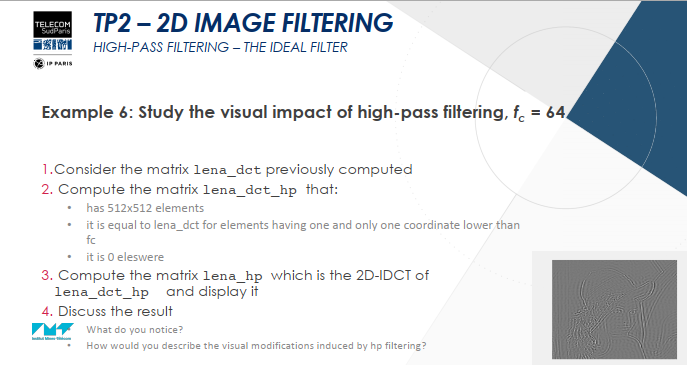

In [16]:
def high_pass_filter(dct_coef, fc):
    """
    get coefficients in the high-freq area
    param:
        dct_coef: is the coefficients of image after applying DCT transform
        fc: is the cut frequency
    return:
        less_sign_coef: is the less significant coefficients over the cut frequency
    """
    less_sign_coef = dct_coef.copy()
    less_sign_coef[:fc, :fc] = 0
    return less_sign_coef

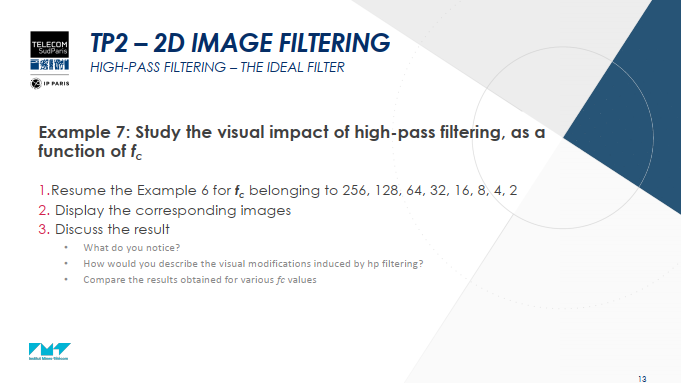

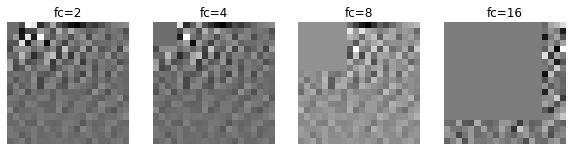

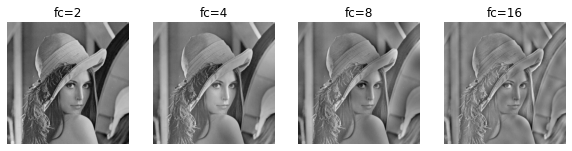

In [17]:
## survey with many different frequencies
list_exp = np.arange(1, 5, 1)
list_fc = np.power(2, list_exp)
list_coef_hpf = []
list_idct = []
for fc in list_fc:
    lena_dct_hp = high_pass_filter(lena_dct, fc)
    list_coef_hpf.append(lena_dct_hp)
    list_idct.append(cv2.idct(lena_dct_hp))
show_grid(np.array(list_coef_hpf)[:,:20,:20], [f'fc={item}' for item in list(list_fc)])
show_grid(np.array(list_idct), [f'fc={item}' for item in list(list_fc)])

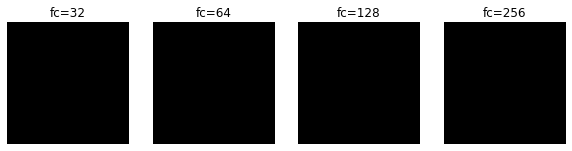

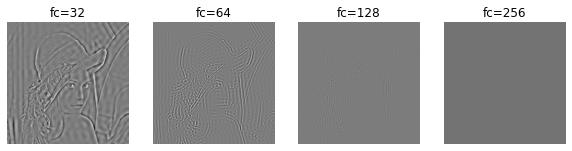

In [18]:
## survey with many different frequencies
list_exp = np.arange(5, 9, 1)
list_fc = np.power(2, list_exp)
list_coef_hpf = []
list_idct = []
for fc in list_fc:
    lena_dct_hp = high_pass_filter(lena_dct, fc)
    list_coef_hpf.append(lena_dct_hp)
    list_idct.append(cv2.idct(lena_dct_hp))
show_grid(np.array(list_coef_hpf)[:,:20,:20], [f'fc={item}' for item in list(list_fc)])
show_grid(np.array(list_idct), [f'fc={item}' for item in list(list_fc)])

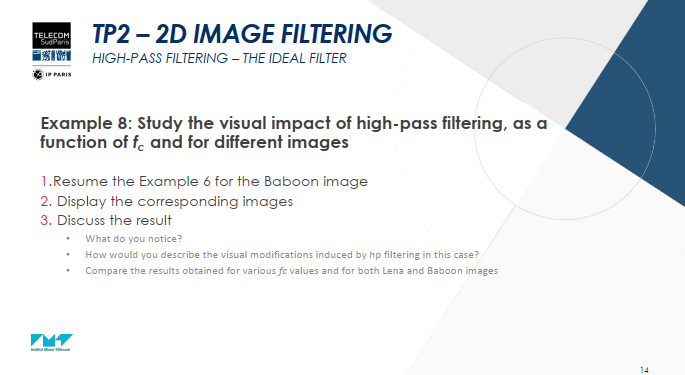

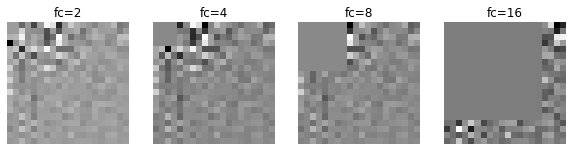

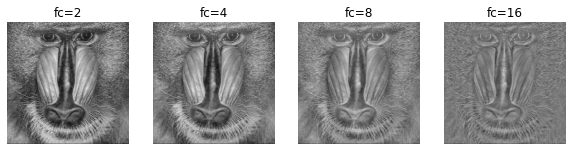

In [19]:
## survey with many different frequencies
list_exp = np.arange(1, 5, 1)
list_fc = np.power(2, list_exp)
list_coef_hpf = []
list_idct = []
for fc in list_fc:
    baboon_dct_hp = high_pass_filter(baboon_dct, fc)
    list_coef_hpf.append(baboon_dct_hp)
    list_idct.append(cv2.idct(baboon_dct_hp))
show_grid(np.array(list_coef_hpf)[:,:20,:20], [f'fc={item}' for item in list(list_fc)])
show_grid(np.array(list_idct), [f'fc={item}' for item in list(list_fc)])

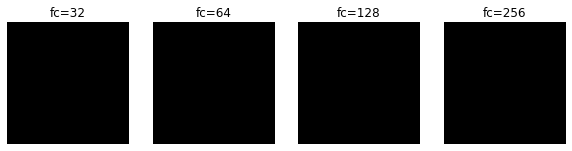

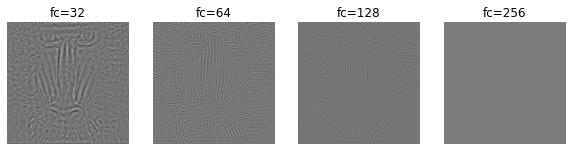

In [20]:
## survey with many different frequencies
list_exp = np.arange(5, 9, 1)
list_fc = np.power(2, list_exp)
list_coef_hpf = []
list_idct = []
for fc in list_fc:
    baboon_dct_hp = high_pass_filter(baboon_dct, fc)
    list_coef_hpf.append(baboon_dct_hp)
    list_idct.append(cv2.idct(baboon_dct_hp))
show_grid(np.array(list_coef_hpf)[:,:20,:20], [f'fc={item}' for item in list(list_fc)])
show_grid(np.array(list_idct), [f'fc={item}' for item in list(list_fc)])